In [1]:
import numpy as np
import pandas as pd 
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [2]:
# Training data
data_app_train = pd.read_csv('DATA/application_train.csv')
print('Training data shape: ', data_app_train.shape)
data_app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Testing data features
data_app_test = pd.read_csv('DATA/application_test.csv')
print('Testing data shape: ', data_app_test.shape)
data_app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


0    282686
1     24825
Name: TARGET, dtype: int64

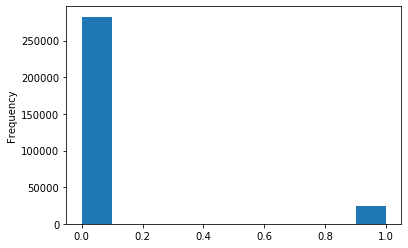

In [4]:
data_app_train['TARGET'].astype(int).plot.hist()
data_app_train['TARGET'].value_counts()

##### Détermination des données manquantes

In [5]:
def missing_values_table(df):
    
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print("Il y a " + str(df.shape[1]) + " colonnes dans ce dataset.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes ayant des valeurs manquantes.")
        
        # Return the dataframe with missing information
        return(mis_val_table_ren_columns)


In [6]:
missing_values = missing_values_table(data_app_train)
missing_values.head(20)

Il y a 122 colonnes dans ce dataset.
Il y a 67 colonnes ayant des valeurs manquantes.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


##### Nombre de classes par colonnes

In [7]:
data_app_train.head(1)
# df_app_train['NAME_TYPE_SUITE'] = df_app_train['NAME_TYPE_SUITE'].replace(np.nan, 'UNKNOW')
# df_app_train['NAME_TYPE_SUITE'].unique()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
data_app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

##### Encodage des labels pour la PCA

In [9]:
# Create a label encoder object
encoding = LabelEncoder()
encoding_count = 0
df_app_train = data_app_train.copy()
df_app_test = data_app_test.copy()

# Iterate through the columns
for col in df_app_train:
    
    if df_app_train[col].dtype == 'object':
        
        # If 2 or fewer unique categories
        
        if len(list(df_app_train[col].unique())) <= 2:
            print(col)
            # Train on the training data
            encoding.fit(df_app_train[col])
            # Transform both training and testing data
            df_app_train[col] = encoding.transform(df_app_train[col])
            df_app_test[col] = encoding.transform(df_app_test[col])
            
            # Keep track of how many columns were label encoded
            encoding_count += 1
            
print('%d colonnes ont été encodées.' % encoding_count)

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
3 colonnes ont été encodées.


In [10]:
# for col in df_app_train:
    
#     if df_app_train[col].dtype == 'object':
                
#         print(col)
#         # Train on the training data
#         encoding.fit(df_app_train[col])
#         # Transform both training and testing data
#         df_app_train[col] = encoding.transform(df_app_train[col])
# #         df_app_test[col] = encoding.transform(df_app_test[col])
            
#         # Keep track of how many columns were label encoded
#         encoding_count += 1
            
# print('%d colonnes ont été encodées.' % encoding_count)

In [11]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_app_train.CODE_GENDER.dtype

dtype('O')

In [13]:
# one-hot encoding of categorical variables
df_app_train = pd.get_dummies(df_app_train)
df_app_test = pd.get_dummies(df_app_test)

print('Training Features shape: ', df_app_train.shape)
print('Testing Features shape: ', df_app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [14]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
train_labels = df_app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_app_train, df_app_test = df_app_train.align(df_app_test, join = 'inner', axis = 1)

# Add the target back in
df_app_train['TARGET'] = train_labels

print('Training Features shape: ', df_app_train.shape)
print('Testing Features shape: ', df_app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


#### Exploration des datasets
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [16]:
data_app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Correlation entre l'âge des clients et de la cible -0.07823930830982694


Text(0, 0.5, 'Freq')

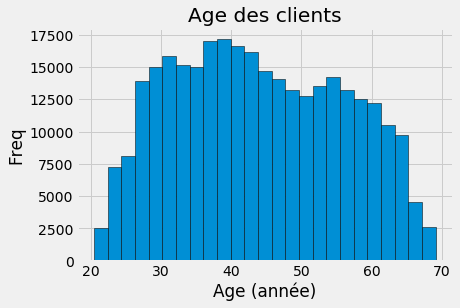

In [17]:
# Find the correlation of the positive days since birth and target
data_app_train['DAYS_BIRTH'] = abs(data_app_train['DAYS_BIRTH'])
print("Correlation entre l'âge des clients et de la cible",
      data_app_train['DAYS_BIRTH'].corr(data_app_train['TARGET']))

# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data_app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age des clients'); plt.xlabel('Age (année)'); plt.ylabel('Freq')

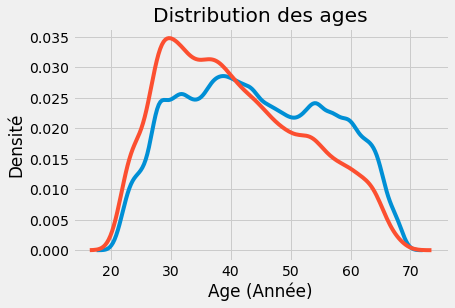

In [18]:
# plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data_app_train.loc[data_app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data_app_train.loc[data_app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (Année)'); plt.ylabel('Densité'); plt.title('Distribution des ages');

In [19]:
# Age information into a separate dataframe
age_data = data_app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [20]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Echec de remboursement par groupe d âge')

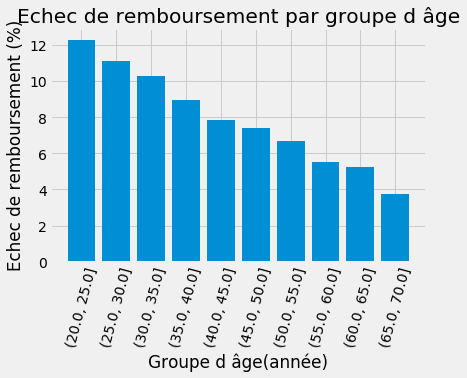

In [21]:
# plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Groupe d'' âge(année)') 
plt.ylabel('Echec de remboursement (%)')
plt.title('Echec de remboursement par groupe d'' âge')

##### Source extérieures:

- Les 3 variables avec les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces caractéristiques représentent un « score normalisé provenant d'une source de données externe ». Il pourrait s'agir d'une sorte de cote de crédit cumulative établie à l'aide de nombreuses sources de données.

In [22]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = data_app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'Correlation Heatmap')

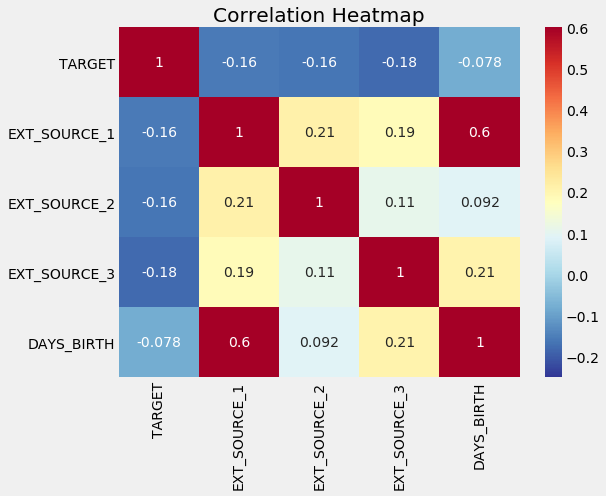

In [23]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

- Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique qu'à mesure que la valeur de EXT_SOURCE augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1, indiquant que l'un des facteurs de ce score est peut-être l'âge du client.

Ré-équilibrage des données avec smote

#### Features importances

In [24]:
# Make a new dataframe for polynomial features
poly_features = df_app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = df_app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [25]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features and create new features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [26]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1',
                                                     'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [27]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.194235
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189593
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176589
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.171729
EXT_SOURCE_1 EXT_SOURCE_2                -0.166538
EXT_SOURCE_1 EXT_SOURCE_3                -0.164933
EXT_SOURCE_2                             -0.160303
EXT_SOURCE_3                             -0.157397
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156791
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.151139
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155847
EXT_SOURCE_2 DAYS_BIRTH                 0.156879
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181417
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [28]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = df_app_train['SK_ID_CURR']
df_app_train_poly = df_app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = df_app_test['SK_ID_CURR']
df_app_test_poly = df_app_train.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
df_app_train_poly, df_app_test_poly = df_app_train_poly.align(df_app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', df_app_train_poly.shape)
print('Testing data with polynomial features shape:  ', df_app_test_poly.shape)


Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:   (307511, 274)


In [29]:
data_app_train_domain = df_app_train.copy()
data_app_test_domain = df_app_test.copy()

data_app_train_domain['CREDIT_INCOME_PERCENT'] = data_app_train_domain['AMT_CREDIT'] / data_app_train_domain['AMT_INCOME_TOTAL']
data_app_train_domain['ANNUITY_INCOME_PERCENT'] = data_app_train_domain['AMT_ANNUITY'] / data_app_train_domain['AMT_INCOME_TOTAL']
data_app_train_domain['CREDIT_TERM'] = data_app_train_domain['AMT_ANNUITY'] / data_app_train_domain['AMT_CREDIT']
data_app_train_domain['DAYS_EMPLOYED_PERCENT'] = data_app_train_domain['DAYS_EMPLOYED'] / data_app_train_domain['DAYS_BIRTH']

- CREDIT_INCOME_PERCENT : le pourcentage du montant du crédit par rapport aux revenus d'un client
- ANNUITY_INCOME_PERCENT : le pourcentage de la rente du prêt par rapport aux revenus d'un client
- CREDIT_TERM : la durée du versement en mois (puisque la rente est le montant mensuel dû
- DAYS_EMPLOYED_PERCENT : le pourcentage des jours occupés par rapport à l'âge du clien

In [30]:
data_app_test_domain['CREDIT_INCOME_PERCENT'] = data_app_test_domain['AMT_CREDIT'] / data_app_test_domain['AMT_INCOME_TOTAL']
data_app_test_domain['ANNUITY_INCOME_PERCENT'] = data_app_test_domain['AMT_ANNUITY'] / data_app_test_domain['AMT_INCOME_TOTAL']
data_app_test_domain['CREDIT_TERM'] = data_app_test_domain['AMT_ANNUITY'] / data_app_test_domain['AMT_CREDIT']
data_app_test_domain['DAYS_EMPLOYED_PERCENT'] = data_app_test_domain['DAYS_EMPLOYED'] / data_app_test_domain['DAYS_BIRTH']

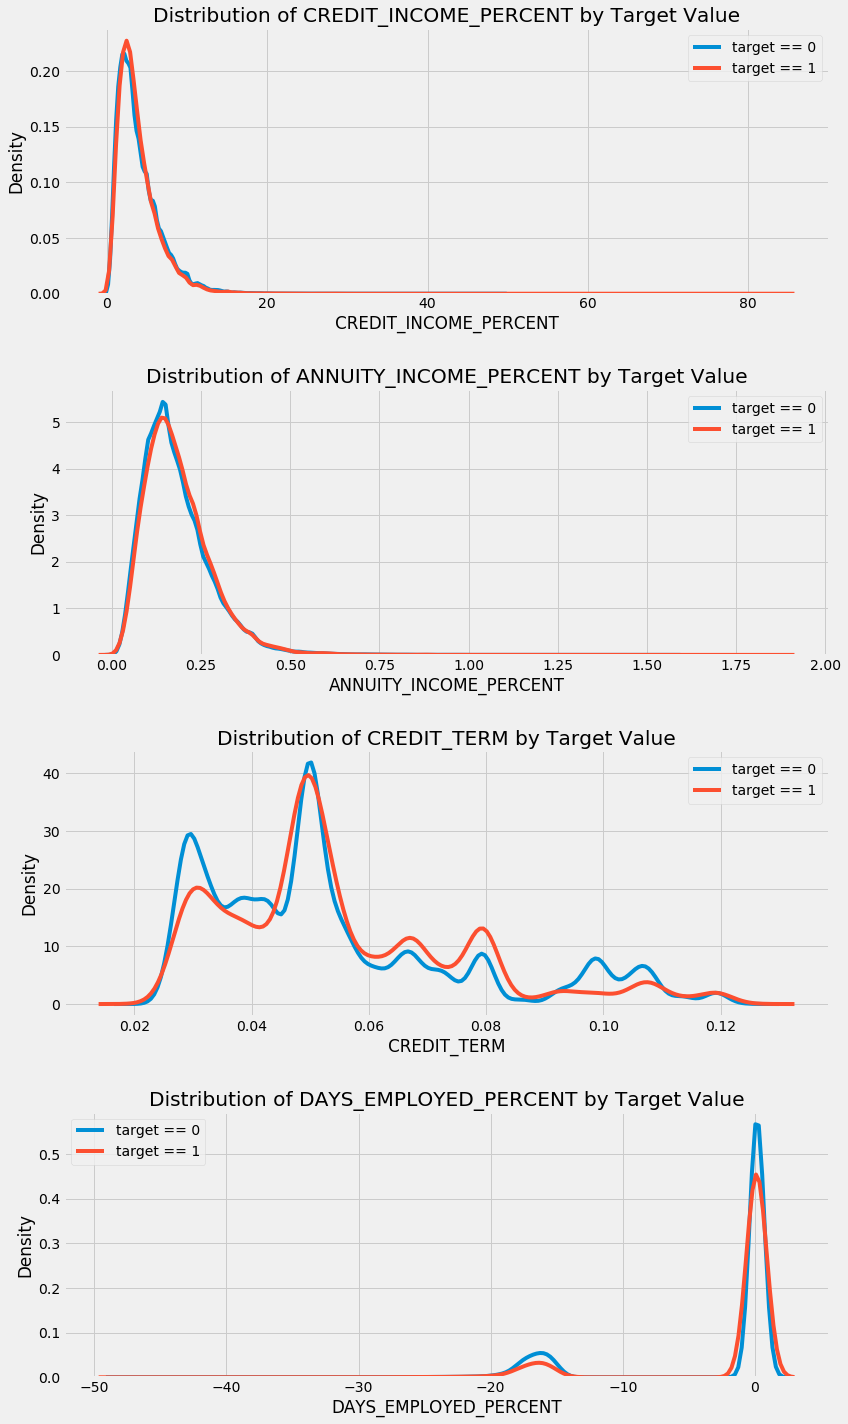

In [31]:
plt.figure(figsize = (12, 20))

# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(data_app_train_domain.loc[data_app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(data_app_train_domain.loc[data_app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)


## Modèles de scoring

### Data
- Pour obtenir une baseline, nous utilisons toutes les features après avoir encodé les variables catégorielles. On remplace les valeurs manquantes (imputation) et on normalise le dataset (mise à l'échelle des caractéristiques). 

In [61]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Drop the target from the training data
if 'TARGET' in df_app_train:
    train = df_app_train.drop(columns = ['TARGET'])
else:
    train = df_app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = df_app_test.copy()

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(df_app_test)

# balance the target dataset
oversample = SMOTE()
# train_labels = df_app_train['TARGET']
train, train_labels = oversample.fit_resample(train, train_labels)

In [62]:
Counter(train_labels)

Counter({1: 282686, 0: 282686})

In [56]:
y = pd.DataFrame(train, columns=df_app_train.columns[:-1])

Training data shape:  (565372, 239)
Testing data shape:  (48744, 239)


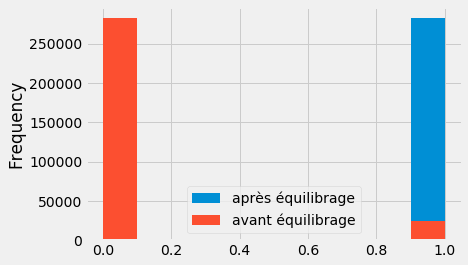

In [63]:
# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

train_labels.plot.hist(label='après équilibrage')
data_app_train['TARGET'].plot.hist(label='avant équilibrage')
data_app_train['TARGET'].value_counts(), train_labels.value_counts()
plt.legend()

### Modèle 1: Régression logisitque

In [64]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001) # a lower value should decrease overfitting

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [65]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [66]:
# Submission dataframe
submit = df_app_test[['SK_ID_CURR']]
submit['TARGET_RL'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET_RL
0,100001,0.375898
1,100005,0.689346
2,100013,0.329307
3,100028,0.398226
4,100038,0.638164


### Modèle 2: RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [68]:
submit['TARGET_RF'] = predictions
submit.head()

,SK_ID_CURR,TARGET_RL,TARGET_RF
0,100001,0.375898,0.05
1,100005,0.689346,0.19
2,100013,0.329307,0.07
3,100028,0.398226,0.14
4,100038,0.638164,0.15


- Les prédictions représentent une probabilité comprise entre 0 et 1 que le prêt ne sera pas remboursé. Si nous utilisions ces prédictions pour classer les candidats, nous pourrions définir un seuil de probabilité pour déterminer qu'un prêt est risqué.

### Modèle 3: XGBOOST

In [69]:
from xgboost import XGBClassifier


# Make the random forest classifier
XGBOOST_Classifier = XGBClassifier(n_estimators = 50)

# Train on the training data
XGBOOST_Classifier.fit(train, train_labels)

# Extract feature importances
feature_importance_values = XGBOOST_Classifier.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = XGBOOST_Classifier.predict_proba(test)[:, 1]

In [70]:
submit['TARGET_XG'] = predictions
submit.head(10)

,SK_ID_CURR,TARGET_RL,TARGET_RF,TARGET_XG
0,100001,0.375898,0.05,0.059609
1,100005,0.689346,0.19,0.217285
2,100013,0.329307,0.07,0.038285
3,100028,0.398226,0.14,0.051615
4,100038,0.638164,0.15,0.135421
5,100042,0.278755,0.12,0.024340
6,100057,0.377489,0.03,0.016795
7,100065,0.583522,0.08,0.046001
8,100066,0.210630,0.04,0.023319
9,100067,0.543968,0.22,0.036765


# Streamlit

In [71]:
from pathlib import Path
import streamlit as st

# @st.cache
# def load_data():
    
#     bikes_data_path = Path() / 'data/bike_sharing_demand_train.csv'
#     data = pd.read_csv(bikes_data_path)
#     return(data)

# df = load_data()
data_app_train = pd.read_csv('DATA/application_train.csv')

st.write(data_app_train)

ImportError: dlopen(/Users/jabarianmaxime/miniconda3/lib/python3.7/site-packages/pyarrow/lib.cpython-37m-darwin.so, 2): Symbol not found: _SSLCopyALPNProtocols
  Referenced from: /Users/jabarianmaxime/miniconda3/lib/python3.7/site-packages/pyarrow/libarrow.600.dylib
  Expected in: /System/Library/Frameworks/Security.framework/Versions/A/Security
 in /Users/jabarianmaxime/miniconda3/lib/python3.7/site-packages/pyarrow/libarrow.600.dylib